In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment

fileroute = r'Axis_Anisotropy_Data/AxisA_08/' # Top level file route

# Ideally will add a way to loop through all directories within the top level directory.

inputfiles = 20 # Number of files to average over

systemAverages = pd.DataFrame()
systemSusc = pd.DataFrame()
systemBinder = pd.DataFrame()

In C:\Users\Robert Clampett\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Robert Clampett\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Robert Clampett\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Robert Clampett\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Robert Clampett\Anaconda3\lib\site-packa

In [2]:
for i in range(inputfiles):
	inputTable = pd.read_csv(fileroute+'20x20_Data/20x20_spinDist_{}.csv'.format(i+1), sep='|', header=None, names='A')
	inputTable = inputTable.A.str.split(',', expand=True)
	inputTable = inputTable.fillna(value=np.nan)
	inputTable = inputTable.astype('float')
	inputTable.set_index(0, inplace=True)
	systemAverages['System {}'.format(i+1)] = inputTable.mean(axis=1, skipna=True)
	systemSusc['System {}'.format(i+1)] = inputTable.var(axis = 1, skipna=True) / inputTable.index
	systemBinder['System {}'.format(i+1)] = inputTable.apply(lambda x: moment(x, moment=2, nan_policy='omit'), axis=1) / inputTable.mean(axis=1, skipna=True)**2
	
systemAverages['Average Magnetic Moment'] = systemAverages.mean(axis=1)
systemSusc['Average Susc'] = systemSusc.mean(axis=1)
systemBinder['Average U2'] = systemBinder.mean(axis=1)


In [3]:
systemAverages2 = pd.DataFrame()
systemSusc2 = pd.DataFrame()
systemBinder2 = pd.DataFrame()

for i in range(inputfiles):
	inputTable = pd.read_csv(fileroute+'40x40_Data/40x40_spinDist_{}.csv'.format(i+1), sep='|', header=None, names='A')
	inputTable = inputTable.A.str.split(',', expand=True)
	inputTable = inputTable.fillna(value=np.nan)
	inputTable = inputTable.astype('float')
	inputTable.set_index(0, inplace=True)
	systemAverages2['System {}'.format(i+1)] = inputTable.mean(axis=1, skipna=True)
	systemSusc2['System {}'.format(i+1)] = inputTable.var(axis = 1, skipna=True) / inputTable.index
	systemBinder2['System {}'.format(i+1)] = inputTable.apply(lambda x: moment(x, moment=2, nan_policy='omit'), axis=1) / inputTable.mean(axis=1, skipna=True)**2
	
systemAverages2['Average Magnetic Moment'] = systemAverages2.mean(axis=1)
systemSusc2['Average Susc'] = systemSusc2.mean(axis=1)
systemBinder2['Average U2'] = systemBinder2.mean(axis=1)

In [6]:
systemAverages3 = pd.DataFrame()
systemSusc3 = pd.DataFrame()
systemBinder3 = pd.DataFrame()

for i in range(10):
	inputTable = pd.read_csv(fileroute+'60x60_Data/60x60_spinDist_{}.csv'.format(i+1), sep='|', header=None, names='A')
	inputTable = inputTable.A.str.split(',', expand=True)
	inputTable = inputTable.fillna(value=np.nan)
	inputTable = inputTable.astype('float')
	inputTable.set_index(0, inplace=True)
	systemAverages3['System {}'.format(i+1)] = inputTable.mean(axis=1, skipna=True)
	systemSusc3['System {}'.format(i+1)] = inputTable.var(axis = 1, skipna=True) / inputTable.index
	systemBinder3['System {}'.format(i+1)] = inputTable.apply(lambda x: moment(x, moment=2, nan_policy='omit'), axis=1) / inputTable.mean(axis=1, skipna=True)**2
	
systemAverages3['Average Magnetic Moment'] = systemAverages3.mean(axis=1)
systemSusc3['Average Susc'] = systemSusc3.mean(axis=1)
systemBinder3['Average U2'] = systemBinder3.mean(axis=1)

<AxesSubplot:xlabel='0'>

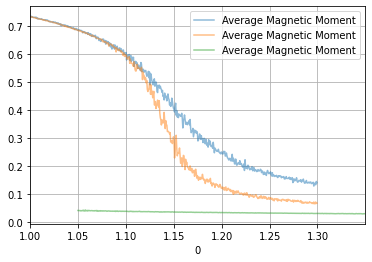

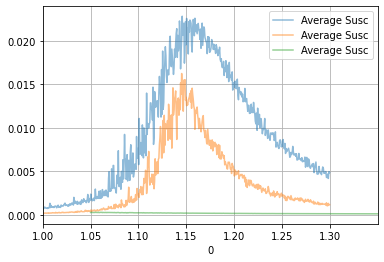

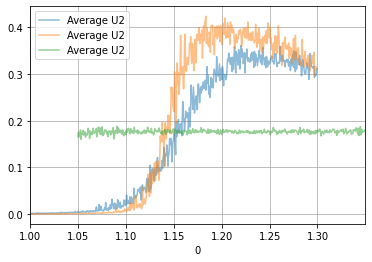

In [7]:
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

systemAverages.plot(y='Average Magnetic Moment', grid=True, ax=ax, alpha=0.5)
systemSusc.plot(y='Average Susc', grid=True, ax=ax2, alpha=0.5)
systemBinder.plot(y='Average U2', grid=True, ax=ax3, alpha=0.5)

systemAverages2.plot(y='Average Magnetic Moment', grid=True, ax=ax, alpha=0.5)
systemSusc2.plot(y='Average Susc', grid=True, ax=ax2, alpha=0.5)
systemBinder2.plot(y='Average U2', grid=True, ax=ax3, alpha=0.5)

systemAverages3.plot(y='Average Magnetic Moment', grid=True, ax=ax, alpha=0.5)
systemSusc3.plot(y='Average Susc', grid=True, ax=ax2, alpha=0.5)
systemBinder3.plot(y='Average U2', grid=True, ax=ax3, alpha=0.5)